Step 1: The Setup (Loading and Pre-processing)

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression #regression models    
from sklearn.metrics import f1_score, roc_auc_score, roc_curve

RANDOM_SEED = 42 #standardises the random state so that it can be produced by different runs and produce same results
df = pd.read_csv('heart.csv') 

print("Inspect the first few rows using .head().") #Inspect the first few rows using .head().

print(df.head())

print("\n INFO ") #Get a summary of the data, paying close attention to data types and non-null values using .info().

df.info()

#Check for and handle any missing values. For simplicity, you can drop rows with missing data for this task.
print("\n Missing Value Count")
print(df.isnull().sum())
    
df_cleaned = df.dropna()
print(f"\nOriginal rows: {len(df)}. Rows after cleaning: {len(df_cleaned)}.")
df = df_cleaned

Inspect the first few rows using .head().
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

 INFO 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null 

Step 2: The Predictor (Linear Regression)

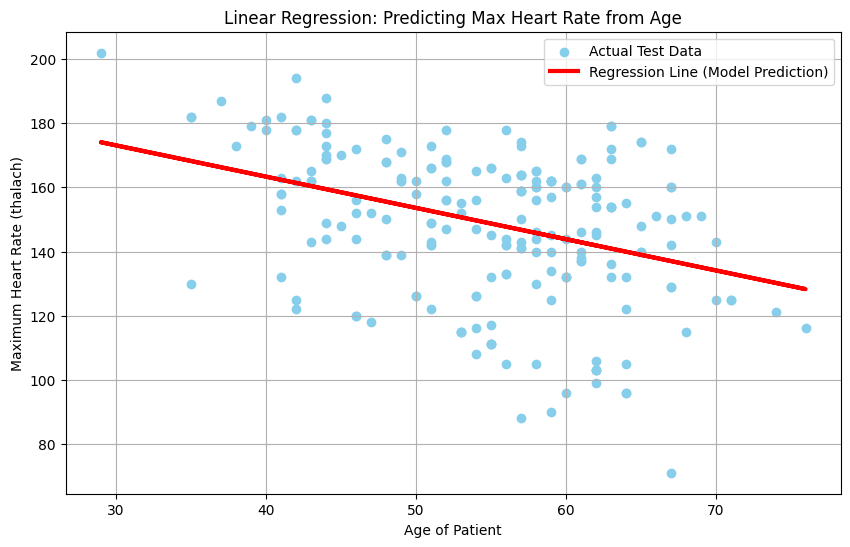

In [13]:
#Select Features (X) and Target (y)
#X (features)- 'age' column
X_lin= df['age'].values.reshape(-1, 1)
#Y (target) -'thalach' column
y_lin = df['thalach'].values

#Using scikit's train_test_split, we split the data into training and testing sets. (80-20)
X_train_lin, X_test_lin, y_train_lin, y_test_lin = train_test_split(
    X_lin, y_lin, test_size=0.2, random_state=RANDOM_SEED
)

#Train the Model: Create and train a LinearRegression model using your training data.

linear_model = LinearRegression()
linear_model.fit(X_train_lin, y_train_lin) #line fitting model based upon the training data

#Use the trained model to predict 'thalach' for the test set 'age' values.
y_pred_lin = linear_model.predict(X_test_lin)

#Visualize the Result
plt.figure(figsize=(10, 6))

#Plot scatter plot (Age vs. thalach)
plt.scatter(X_test_lin, y_test_lin, color='skyblue', label='Actual Test Data')

#Plot the regression line
plt.plot(X_test_lin, y_pred_lin, color='red', linewidth=3, label='Regression Line (Model Prediction)')

plt.title('Linear Regression: Predicting Max Heart Rate from Age')
plt.xlabel('Age of Patient')
plt.ylabel('Maximum Heart Rate (thalach)')
plt.legend()
plt.grid(True)
plt.show()

Step 3: The Classifier (Logistic Regression)

In [14]:

#X: Using a selection of features: age, sex, cp, trestbps, and chol.
#Y: Use the target column.
features_log = ['age', 'sex', 'cp', 'trestbps', 'chol']
X_log = df[features_log]
y_log = df['target']
# Split the data into training (80%) and testing (20%) sets.
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(
    X_log, y_log, test_size=0.2, random_state=RANDOM_SEED
)

#Train the Logistic Regression model
#max_iter=1000 helps the model find the best fit.
logistic_model = LogisticRegression(max_iter=1000, random_state=RANDOM_SEED)
#Train the model using the training data.
logistic_model.fit(X_train_log, y_train_log)

print("Logistic Regression Model Trained Successfully.")

Logistic Regression Model Trained Successfully.


Step 4: The Judge (Model Evaluation)
Now we evaluate the performance of the trained classifier using key metrics.

F1-Score: 0.7902
ROC-AUC Score: 0.8615


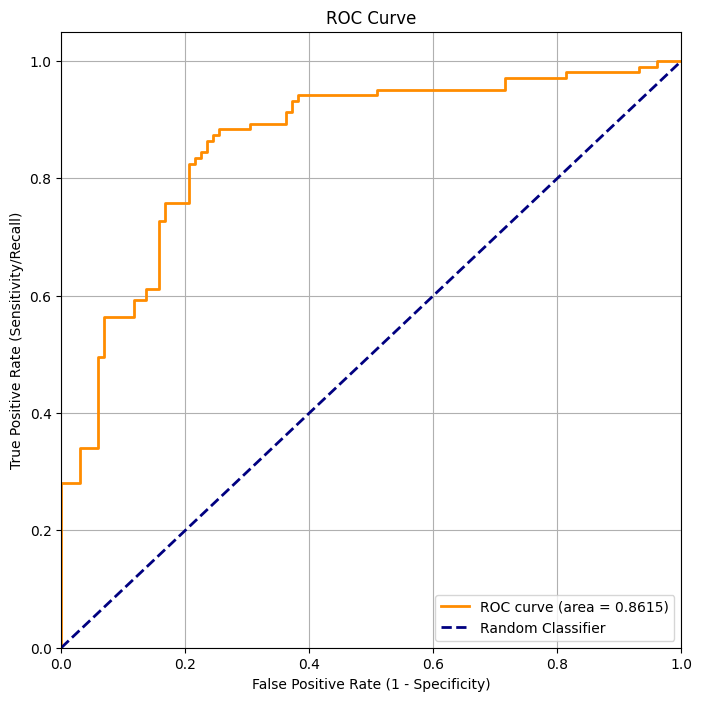

In [16]:
#Predict the final class (0 or 1) for the test set.
y_pred_log = logistic_model.predict(X_test_log)
#Predict the probability of the positive class (class 1, heart disease) for the ROC curve.
y_pred_proba_log = logistic_model.predict_proba(X_test_log)[:, 1]

# Calculate the F1-Score to balance Precision and Recall.
f1 = f1_score(y_test_log, y_pred_log)
# Calculate the ROC-AUC score to measure overall discriminative ability.
roc_auc = roc_auc_score(y_test_log, y_pred_proba_log)

print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

# 3. Plot the ROC Curve
# Calculate the points (FPR, TPR) needed to draw the curve.
fpr, tpr, thresholds = roc_curve(y_test_log, y_pred_proba_log)

plt.figure(figsize=(8, 8))
# Plot the ROC curve, labeling it with the calculated AUC score.
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
# Plot the diagonal line representing a random classifier (AUC = 0.5).
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity/Recall)')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()